In [6]:

%pip install matplotlib seaborn

     ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
     ------------- ----------------------- 41.0/110.1 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 110.1/110.1 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 16.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.2/8.1 MB 23.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 42.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 43.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------------------------------- 294.9/294.9 kB 17.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/225.2 kB ? eta -:--:--
   ---------------------------------------- 225.2/225.2 kB 6.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ----------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\kmayo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# 🔍 Load the dataset
bookings = pd.read_csv("../data/hotel_bookings_clean.csv")

# 👀 Preview the first few rows
bookings.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/hotel_bookings_clean.csv'

In [9]:
import os
os.getcwd()

'c:\\Users\\kmayo\\OneDrive\\Documents\\GitHub\\kmayo9.github.io\\hotel-booking-demand-analysis\\notebooks'

In [10]:
import pandas as pd

# Load the dataset
bookings = pd.read_csv("../data/hotel_bookings_clean.csv")

# Preview the shape and first few rows
print("Shape:", bookings.shape)
bookings.head()

Shape: (100, 54)


,index,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,342,27,1,7,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,737,27,1,7,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,7,27,1,7,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,3,0,13,27,1,7,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,4,0,14,27,1,7,0,2,2,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
# Check for missing values
bookings.isnull().sum()

# Check column types
bookings.dtypes

index                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
arrival_date_month                  int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
required_car_parking_spaces         int64
total_of_special_requests           int64
avg_daily_rate                    float64
booked_by_company                   int64
booked_by_agent                     int64
hotel_City                          int64
hotel_Resort                        int64
meal_BB                             int64
meal_FB                             int64
meal_HB                           

In [12]:
# Convert binary columns to boolean
binary_cols = bookings.columns[bookings.nunique() == 2]
bookings[binary_cols] = bookings[binary_cols].astype(bool)

In [13]:
# Create arrival_date from components
bookings['arrival_date'] = pd.to_datetime({
    'year': 2016,  # or use a placeholder if year is missing
    'month': bookings['arrival_date_month'],
    'day': bookings['arrival_date_day_of_month']
})

In [14]:
# Total guests
bookings['total_guests'] = bookings['adults'] + bookings['children'] + bookings['babies']

# Flag bookings with zero guests
bookings['no_guests_flag'] = bookings['total_guests'] == 0

In [15]:
bookings[['arrival_date', 'total_guests', 'no_guests_flag']].head()

,arrival_date,total_guests,no_guests_flag
0,2016-07-01,2,False
1,2016-07-01,2,False
2,2016-07-01,1,False
3,2016-07-01,1,False
4,2016-07-01,2,False


In [16]:
# Cancellation rate by market segment
segment_cancel = bookings.groupby('market_segment_Direct')['is_canceled'].mean()
print("Direct Segment Cancellation Rate:", segment_cancel)

Direct Segment Cancellation Rate: market_segment_Direct
False    0.2625
True     0.1000
Name: is_canceled, dtype: float64


In [17]:
segment_cols = [col for col in bookings.columns if col.startswith('market_segment_')]
segment_cancel_rates = {
    col: bookings[bookings[col]]['is_canceled'].mean()
    for col in segment_cols
}
pd.Series(segment_cancel_rates).sort_values(ascending=False)

KeyError: "None of [Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n       0, 0, 0, 0],\n      dtype='int64')] are in the [columns]"

In [18]:
segment_cancel_rates = {
    col: bookings.loc[bookings[col], 'is_canceled'].mean()
    for col in segment_cols
}
pd.Series(segment_cancel_rates).sort_values(ascending=False)

market_segment_Online_TA        0.326923
market_segment_Offline_TA_TO    0.153846
market_segment_Direct           0.100000
market_segment_Aviation         0.000000
market_segment_Corporate        0.000000
market_segment_Complementary    0.000000
market_segment_Groups           0.000000
market_segment_Undefined        0.000000
dtype: float64

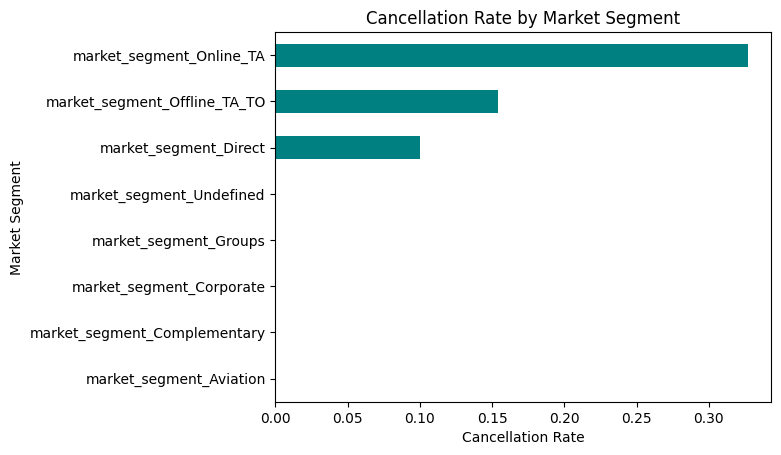

In [19]:
pd.Series(segment_cancel_rates).sort_values().plot(kind='barh', color='teal')
plt.title("Cancellation Rate by Market Segment")
plt.xlabel("Cancellation Rate")
plt.ylabel("Market Segment")
plt.show()

In [20]:
# Booking duration
bookings['stay_length'] = bookings['stays_in_weekend_nights'] + bookings['stays_in_week_nights']

# Weekend-heavy flag
bookings['weekend_heavy'] = bookings['stays_in_weekend_nights'] > bookings['stays_in_week_nights']

# Booking commitment signals
bookings['has_special_requests'] = bookings['total_of_special_requests'] > 0
bookings['has_parking'] = bookings['required_car_parking_spaces'] > 0

# Booking channel: OTA flag
bookings['is_OTA'] = bookings['distribution_channel_TA_TO'] | bookings['market_segment_Online_TA']

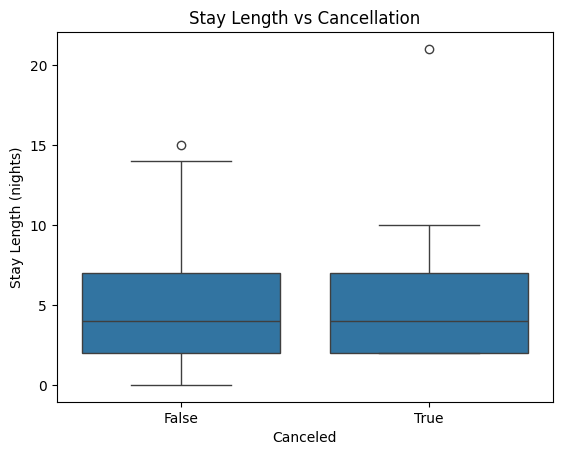

In [21]:
sns.boxplot(data=bookings, x='is_canceled', y='stay_length')
plt.title("Stay Length vs Cancellation")
plt.xlabel("Canceled")
plt.ylabel("Stay Length (nights)")
plt.show()

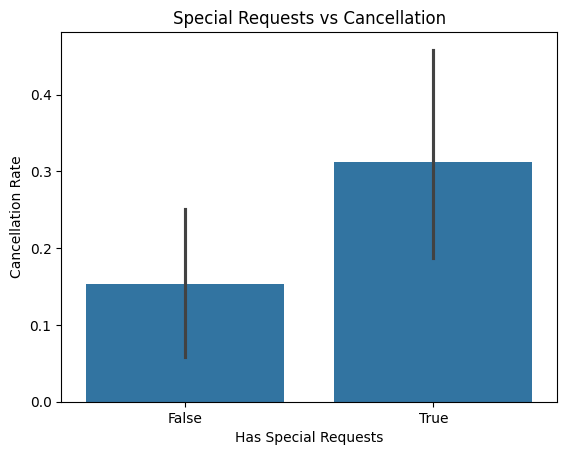

In [22]:
sns.barplot(data=bookings, x='has_special_requests', y='is_canceled')
plt.title("Special Requests vs Cancellation")
plt.xlabel("Has Special Requests")
plt.ylabel("Cancellation Rate")
plt.show()

In [24]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 802.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
    --------------------------------------- 0.2/8.9 MB 13.0 MB/s eta 0:00:01
   ----- ---------------------------------- 1.2/8.9 MB 15.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/8.9 MB 28.1 MB/s eta 0:00:01
   -------------------------------- ------- 7.3/8.9 MB 46.8 MB/s eta 0:00:01
   ---------------------------------------  8.9/8.9 MB 51.7 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 43.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/307.7 kB ? eta -:--:--
   --------------------------------------- 307.7/307.7 kB 19.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---- --------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\kmayo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select features
features = [
    'lead_time', 'stay_length', 'total_guests',
    'is_repeated_guest', 'previous_cancellations',
    'has_special_requests', 'has_parking', 'is_OTA'
]
X = bookings[features]
y = bookings['is_canceled']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      1.00      0.91        15
        True       1.00      0.40      0.57         5

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



In [26]:
from sklearn.utils import resample

# Separate classes
canceled = bookings[bookings['is_canceled']]
not_canceled = bookings[~bookings['is_canceled']]

# Upsample canceled
canceled_upsampled = resample(canceled, replace=True, n_samples=len(not_canceled), random_state=42)

# Combine
balanced = pd.concat([not_canceled, canceled_upsampled])

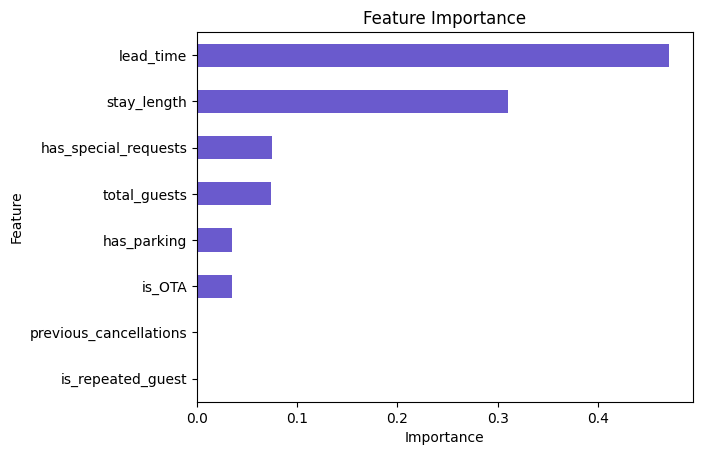

In [27]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', color='slateblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [28]:
# Normalize lead time
bookings['lead_time_norm'] = bookings['lead_time'] / bookings['lead_time'].max()

# Weighted risk score
bookings['cancel_risk_score'] = (
    bookings['lead_time_norm'] * 0.4 +
    bookings['stay_length'] * -0.1 +
    bookings['has_special_requests'].astype(int) * -0.2 +
    bookings['total_guests'] * -0.1 +
    bookings['has_parking'].astype(int) * -0.1 +
    bookings['is_OTA'].astype(int) * 0.2 +
    bookings['previous_cancellations'] * 0.2
)

In [29]:
# Risk level
bookings['risk_level'] = pd.cut(
    bookings['cancel_risk_score'],
    bins=[-float('inf'), 0, 0.3, 0.6, float('inf')],
    labels=['Very Low', 'Low', 'Medium', 'High']
)

In [30]:
# Select key columns
dashboard_cols = [
    'arrival_date', 'lead_time', 'stay_length', 'total_guests',
    'avg_daily_rate', 'is_canceled', 'has_special_requests',
    'has_parking', 'is_OTA', 'previous_cancellations',
    'cancel_risk_score', 'risk_level'
]

# Add segment/channel flags if needed
segment_cols = [col for col in bookings.columns if col.startswith('market_segment_')]
channel_cols = [col for col in bookings.columns if col.startswith('distribution_channel_')]

# Combine all
dashboard_df = bookings[dashboard_cols + segment_cols + channel_cols]

# Save to CSV
dashboard_df.to_csv("../data/hotel_dashboard_ready.csv", index=False)